In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, random_split
from PIL import Image

import matplotlib.pyplot as plt

In [14]:


img = Image.open(r'C:\Users\Ananya\Downloads\archive\Training\pituitary\Tr-pi_1442.jpg')
print(f"Original Image Size: {img.size}")  # (width, height)

Original Image Size: (512, 512)


In [15]:




# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize images to 150x150
    transforms.ToTensor(),           # Convert images to tensors
    # transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize (assuming grayscale images)
])

# Load the image
img = Image.open(r'C:\Users\Ananya\Downloads\archive\Training\pituitary\Tr-pi_1442.jpg')

# Apply the transformations
img_resized = transform(img)

# Print the shape of the resized image
print(f"Resized Image Shape: {img_resized.shape}")  # (channels, height, width)


Resized Image Shape: torch.Size([1, 150, 150])


In [16]:
img = Image.open(r'C:\Users\Ananya\Downloads\archive\Training\pituitary\Tr-pi_1442.jpg')
print(f"Original Image Size: {img.size}")  # (width, height)

Original Image Size: (512, 512)


In [17]:
# Load the dataset
dataset_path = r'C:\Users\Ananya\Downloads\archive'
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

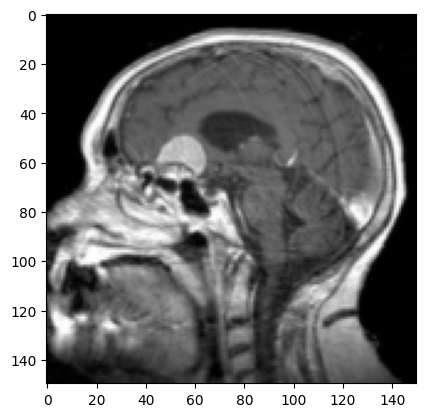

In [18]:
plt.imshow(dataset[345][0].permute((1, 2, 0)).numpy())

In [19]:


img = Image.open(r'C:\Users\Ananya\Downloads\archive\Training\pituitary\Tr-pi_1442.jpg')
print(f"Original Image Size: {img.size}")  # (width, height)

Original Image Size: (512, 512)


In [20]:
# Split into train and test sets (e.g., 80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [28]:
# Create DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [46]:
# 1. Define the CNN model and two functions within it (one is constructor init, other is forward function)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 37 * 37, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

        
    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 37 * 37)  # Flatten
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [47]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 4. Train the model
epochs = 5
for epoch in range(epochs):
    for images, labels in train_loader:
        images, labels = images, labels
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        # print(f"loss = {loss}, {type(loss)}")
        loss.backward()
        optimizer.step()


    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/5, Loss: 0.5612
Epoch 2/5, Loss: 0.4263
Epoch 3/5, Loss: 0.5153
Epoch 4/5, Loss: 0.3883
Epoch 5/5, Loss: 0.3136
